In [1]:
from pykrx import stock
from pykrx import bond
import FinanceDataReader as fdr

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
sns.set()
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



# Data Load

In [2]:
from pykrx import stock
from pykrx import bond

In [3]:
stock_ticker=stock.get_market_ticker_list("20200312",market='KOSPI') #KOSPI, KOSDAQ, KONEX
stock_ticker[:5]

['095570', '006840', '027410', '282330', '138930']

In [4]:
stock_name_list=[]
for ticker in stock_ticker:
    name=stock_name=stock.get_market_ticker_name(ticker)
    stock_name_list.append(name)

In [5]:
dic={'stock_ticker':stock_ticker,'stock_name':stock_name_list}
stock_df=pd.DataFrame(dic)
stock_df.head()

,stock_ticker,stock_name
0,095570,AJ네트웍스
1,006840,AK홀딩스
2,027410,BGF
3,282330,BGF리테일
4,138930,BNK금융지주


In [6]:
# 20220103~20221229
# df = stock.get_market_ohlcv("2022-03-09", "2022-03-13", "005930")[['종가','등락률']]
# df.head()

In [7]:
# stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")['종가']

In [8]:
ohlcv_list=[]
for i in stock_ticker[:5]:
    ohlcv_list.append(stock.get_market_ohlcv("2021-01-01", "2021-12-31", i)['종가'])
    # print(ohlcv_list)

In [9]:
ohlcv_df=pd.DataFrame(ohlcv_list)
ohlcv_df=ohlcv_df.T
ohlcv_df.columns=stock_name_list[:5]
ohlcv_df.head()

,AJ네트웍스,AK홀딩스,BGF,BGF리테일,BNK금융지주
날짜,,,,,
2021-01-04,4580,25250,4990,132000,5560
2021-01-05,4935,25050,5030,134500,5580
2021-01-06,4710,24900,4970,134000,5570
2021-01-07,4695,25200,4930,136500,5780
2021-01-08,4540,25350,4905,141000,5780


In [10]:
ohlcv_df=ohlcv_df.pct_change()
ohlcv_df.dropna(inplace=True,axis=0)

In [11]:
ohlcv_df.head()

,AJ네트웍스,AK홀딩스,BGF,BGF리테일,BNK금융지주
날짜,,,,,
2021-01-05,0.077511,-0.007921,0.008016,0.018939,0.003597
2021-01-06,-0.045593,-0.005988,-0.011928,-0.003717,-0.001792
2021-01-07,-0.003185,0.012048,-0.008048,0.018657,0.037702
2021-01-08,-0.033014,0.005952,-0.005071,0.032967,0.000000
2021-01-11,-0.039648,-0.021696,-0.043833,-0.039007,-0.010381


In [12]:
log_ohlcv_df=np.log(1+ohlcv_df)
log_ohlcv_df.head()

,AJ네트웍스,AK홀딩스,BGF,BGF리테일,BNK금융지주
날짜,,,,,
2021-01-05,0.074654,-0.007952,0.007984,0.018762,0.003591
2021-01-06,-0.046665,-0.006006,-0.012000,-0.003724,-0.001794
2021-01-07,-0.003190,0.011976,-0.008081,0.018485,0.037009
2021-01-08,-0.033571,0.005935,-0.005084,0.032435,0.000000
2021-01-11,-0.040455,-0.021935,-0.044823,-0.039788,-0.010435


In [13]:
e=log_ohlcv_df.mean()*252
w = [0.3, 0.2, 0.1,0.1,0.3]
np.dot(w,e)

0.1383312126647637

In [14]:
log_ohlcv_df.cov()

,AJ네트웍스,AK홀딩스,BGF,BGF리테일,BNK금융지주
AJ네트웍스,0.000484,0.000056,0.000097,0.000078,0.000065
AK홀딩스,0.000056,0.000579,0.000173,0.000125,0.000110
BGF,0.000097,0.000173,0.000536,0.000122,0.000065
BGF리테일,0.000078,0.000125,0.000122,0.000464,0.000081
BNK금융지주,0.000065,0.000110,0.000065,0.000081,0.000268


In [15]:
C=(log_ohlcv_df.cov()*252).values
w = np.array([0.3, 0.2, 0.1,0.1,0.3])
np.dot(w.T,np.dot(w,C))

0.041827879829610656

In [16]:
annual_return=log_ohlcv_df.mean()*252
annual_cov=log_ohlcv_df.cov()*252

port_returns = [] 
port_risk    = [] 
port_weights = [] 
port_sharp   = [] 
stocks = log_ohlcv_df.columns

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights = weights / np.sum(weights) 
    
    returns=np.dot(weights,annual_return)
    risk=np.dot(weights.T,np.dot(weights,annual_cov))
    sharp=returns/risk
    
    port_returns.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    port_sharp.append(sharp)

In [17]:
port_dic={"returns":port_returns,"risk":port_risk,"sharp":port_sharp,"weights":port_weights}
df=pd.DataFrame(port_dic)
df.head(2)

,returns,risk,sharp,weights
0,-0.005114,0.055672,-0.091860,"[0.1099824068809652, 0.4104702520076521, 0.0719369895761941, 0.2709568458552031, 0.13665350567998555]"
1,0.085793,0.044724,1.918295,"[0.14085127992809315, 0.20668739569311537, 0.22150353732077008, 0.23658740328466585, 0.19437038377335553]"


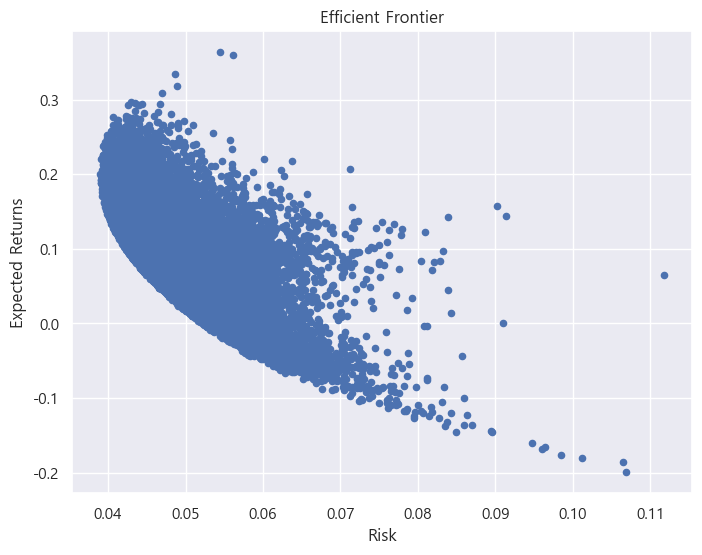

In [18]:
df.plot.scatter(x='risk', y='returns', figsize=(8, 6), grid=True)

plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

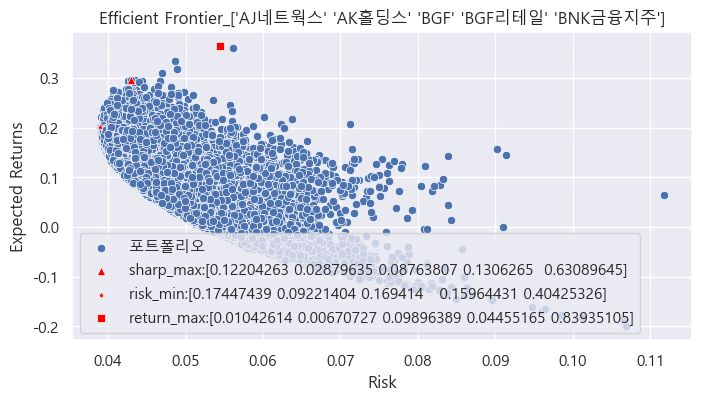

In [19]:
# 샤프치수   최대 포트
sharp_max = df[df['sharp'] == df['sharp'].max()]
# 위험리스크 최소 포트
risk_min  = df[df['risk'] == df['risk'].min()] 
# 수익률     최대 포트
return_max = df[df['returns'] == df['returns'].max()] 

plt.figure(figsize=(8,4))
sns.scatterplot(data=df        , x='risk', y='returns'                     , label=f"포트폴리오")
sns.scatterplot(data=sharp_max , x='risk', y='returns', marker="^", c='red', label=f"sharp_max:{sharp_max['weights'].values[0]}")
sns.scatterplot(data=risk_min  , x='risk', y='returns', marker="*", c='red', label=f"risk_min:{risk_min['weights'].values[0]}")
sns.scatterplot(data=return_max, x='risk', y='returns', marker="s", c='red', label=f"return_max:{return_max['weights'].values[0]}")

plt.title(f'Efficient Frontier_{stocks.values}') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

In [20]:
df=stock.get_market_ohlcv("2022-01-01", "2022-12-31",'095570')[['종가','등락률']]
df.head()

,종가,등락률
날짜,,
2022-01-03,5320,-1.66
2022-01-04,5320,0.00
2022-01-05,5230,-1.69
2022-01-06,5090,-2.68
2022-01-07,5120,0.59


In [21]:
df['daily_return']=df['종가'].pct_change()
df['cumulative_return']=(1+df['daily_return']).cumprod()-1
df['cumulative_daily_return']=(1+df['cumulative_return'])**(1/252)-1

df['log_return']=np.log(1+df['daily_return'])
df['cumulative_log_return']=df['log_return'].cumsum()
df.dropna(inplace=True,axis=0)
df.head()

,종가,등락률,daily_return,cumulative_return,cumulative_daily_return,log_return,cumulative_log_return
날짜,,,,,,,
2022-01-04,5320,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-05,5230,-1.69,-0.016917,-0.016917,-0.000068,-0.017062,-0.017062
2022-01-06,5090,-2.68,-0.026769,-0.043233,-0.000175,-0.027133,-0.044195
2022-01-07,5120,0.59,0.005894,-0.037594,-0.000152,0.005877,-0.038319
2022-01-10,5010,-2.15,-0.021484,-0.058271,-0.000238,-0.021719,-0.060037


In [22]:
ㅇㄻㅇㄹㄴㅁㄹㅇ

NameError: name 'ᄋᆱᄋᄅᄂᄆᄅᄋ' is not defined

In [ ]:
from bs4 import BeautifulSoup
import requests


In [ ]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">안녕하세요</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""

soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

In [ ]:
res = requests.get("https://www.asiae.co.kr/section/economy")
print(res.status_code)
res.text[:1000]

In [ ]:
#container > div.content > div.cont_section_body > div.area_seclstview > div > div:nth-child(1) > ul

In [ ]:
# soup = BeautifulSoup(res.text,'html.parser',from_encoding='cp949')
# soup = BeautifulSoup(res.content.decode('euc-kr', 'replace'), 'html.parser',from_encoding='cp949')
soup = BeautifulSoup(res.content, 'html.parser', from_encoding='utf-8')
# soup = BeautifulSoup(res.text, 'html.parser',from_encoding='cp949')

news_list=[]
li_list = soup.select("#container > div.content > div.cont_section_body > div.area_seclstview > div > div:nth-child(1) > ul > li")
# print(li_list)
for li in li_list:
    title    = li.select_one("div.inner_txt > h3 > a").text
    regdate  = li.select_one("div.inner_txt > p.txt_time > span.t_time").text
    contents = li.select_one("div.inner_txt > p.txt_info").text
    href     = li.select_one("div.inner_txt > h3 > a").get('href')
    news_list.append(   [title,regdate,contents,href]   )
news_list

In [ ]:
craw_df=pd.DataFrame(news_list, columns=['title','regdate','contents','href'])
craw_df